# **Task-4**
Deep Neural Network (DNN) for Fault Classification

#Objective:

 Implement a fully connected deep neural network to classify engine faults vs. normal operation.

Steps:

1.Prepare the dataset (normalize features, encode labels).

2.Build a simple DNN with a few dense layers using TensorFlow or PyTorch.

3.Train, validate, and test the model.

4.Compare the DNN’s performance with previous classical ML models.

# Expected Outcome:

 Basic Neural network design, training, and evaluation for tabular data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, auc, roc_curve, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.cluster import KMeans
import seaborn as sns
from itertools import cycle
from tensorflow.keras.layers import LSTM

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Data-set

In [ ]:
df = pd.read_csv('/content/engine_failure_dataset.csv')
df.head()

,Time_Stamp,Temperature (°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode
0,2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,Idle
1,2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising
2,2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising
3,2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising
4,2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising


In [ ]:
print("\nClass Counts:")
print(df['Fault_Condition'].value_counts())


Class Counts:
Fault_Condition
2    265
0    258
1    248
3    229
Name: count, dtype: int64


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time_Stamp           0
Temperature (°C)     0
RPM                  0
Fuel_Efficiency      0
Vibration_X          0
Vibration_Y          0
Vibration_Z          0
Torque               0
Power_Output (kW)    0
Fault_Condition      0
Operational_Mode     0
dtype: int64


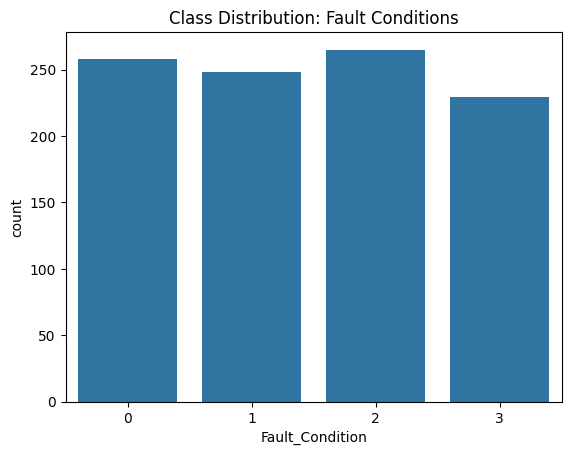

In [ ]:
sns.countplot(data=df, x='Fault_Condition')
plt.title('Class Distribution: Fault Conditions')
plt.show()

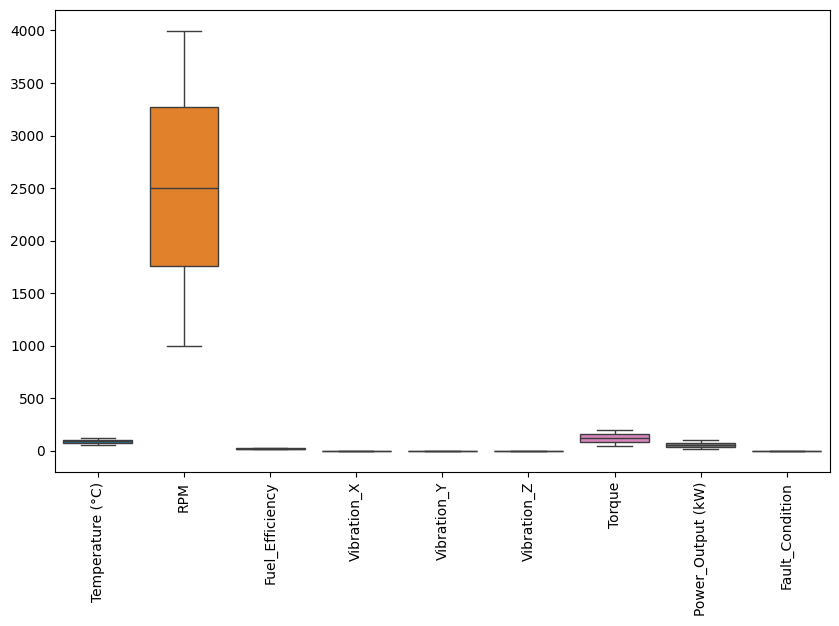

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

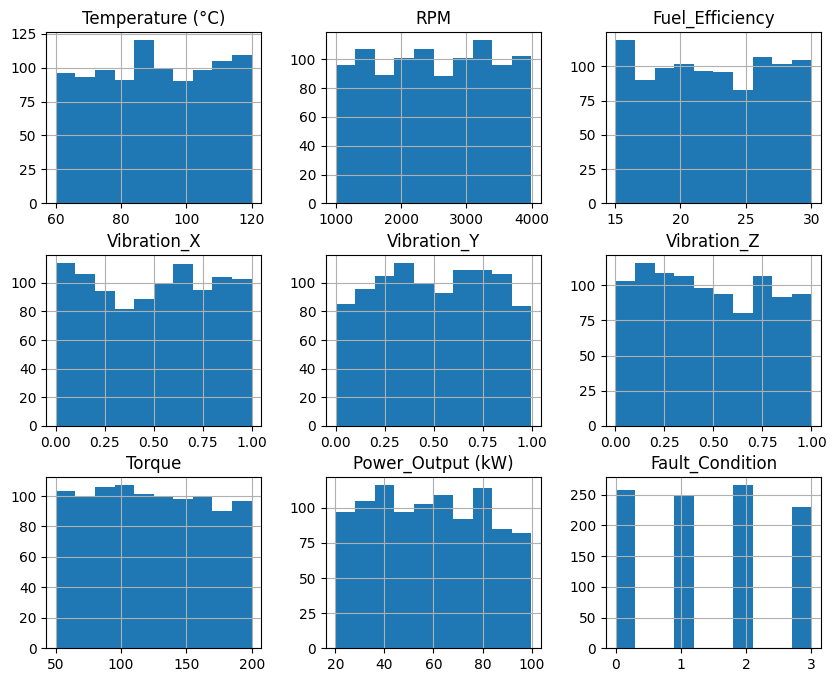

In [ ]:
df.hist(figsize=(10, 8))
plt.show()

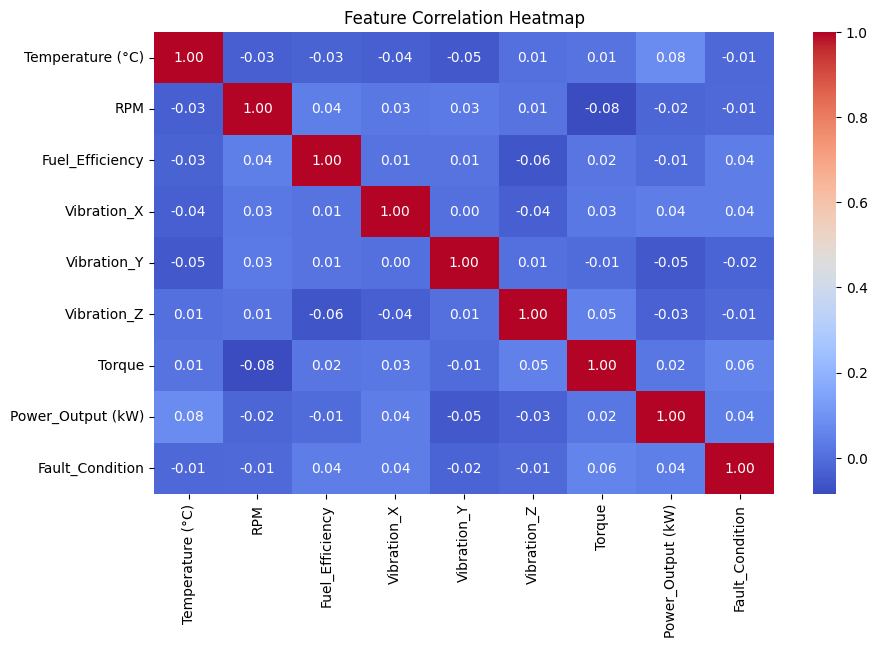

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Deep Neural Network (DNN)

In [ ]:
X = df.drop(['Fault_Condition', 'Time_Stamp'], axis=1)
y = df['Fault_Condition']
# Handle categorical features with one-hot encoding
X = pd.get_dummies(X, columns=['Operational_Mode'], drop_first=True)

In [ ]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(np.unique(y_encoded))

# One-hot encode labels (for Keras DNN)
y_onehot = to_categorical(y_encoded)

In [ ]:
# Use y_onehot for Keras DNN
X_train_val, X_test, y_train_val_encoded, y_test_encoded = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
X_train_encoded, X_val_encoded, y_train_encoded, y_val_encoded = train_test_split(X_train_val, y_train_val_encoded, test_size=0.2, random_state=42)

X_train_val_onehot, X_test_onehot, y_train_val_onehot, y_test_onehot = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)
X_train_onehot, X_val_onehot, y_train_onehot, y_val_onehot = train_test_split(X_train_val_onehot, y_train_val_onehot, test_size=0.2, random_state=42)

X_train_dnn, X_val_dnn, X_test_dnn = X_train_onehot, X_val_onehot, X_test_onehot
y_train_dnn, y_val_dnn, y_test_dnn = y_train_onehot, y_val_onehot, y_test_onehot

X_train_rf, X_val_rf, X_test_rf = X_train_encoded, X_val_encoded, X_test
y_train_rf, y_val_rf, y_test_rf = y_train_encoded, y_val_encoded, y_test_encoded

In [ ]:
print("Data preparation complete.")
print("X_train_dnn shape:", X_train_dnn.shape)
print("y_train_dnn shape:", y_train_dnn.shape)
print("X_test_dnn shape:", X_test_dnn.shape)
print("y_test_dnn shape:", y_test_dnn.shape)
print("X_train_rf shape:", X_train_rf.shape)
print("y_train_rf shape:", y_train_rf.shape)
print("X_test_rf shape:", X_test_rf.shape)
print("y_test_rf shape:", y_test_rf.shape)

Data preparation complete.
X_train_dnn shape: (640, 10)
y_train_dnn shape: (640, 4)
X_test_dnn shape: (200, 10)
y_test_dnn shape: (200, 4)
X_train_rf shape: (640, 10)
y_train_rf shape: (640,)
X_test_rf shape: (200, 10)
y_test_rf shape: (200,)


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train_dnn, y_train_dnn,
    epochs=30,
    batch_size=32,
    validation_data=(X_val_dnn, y_val_dnn),
    verbose=1
)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2015 - loss: 1.4424 - val_accuracy: 0.2688 - val_loss: 1.3875
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2888 - loss: 1.3761 - val_accuracy: 0.2625 - val_loss: 1.3925
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3008 - loss: 1.3722 - val_accuracy: 0.2688 - val_loss: 1.3952
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2919 - loss: 1.3691 - val_accuracy: 0.2438 - val_loss: 1.3969
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3101 - loss: 1.3675 - val_accuracy: 0.2750 - val_loss: 1.3969
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3024 - loss: 1.3588 - val_accuracy: 0.2812 - val_loss: 1.4014
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3041 - loss: 1.3571 - val_accuracy: 0.2625 - val_loss: 1.4086
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3314 - loss: 1.3612 - val_accuracy: 0.2562 - val_loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test_dnn, y_test_dnn)
print(f"Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3027 - loss: 1.4672  
Test Accuracy: 0.2800 | Test Loss: 1.5015


In [ ]:
y_pred_probs = model.predict(X_test_dnn)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_dnn, axis=1)

# Get original unique fault conditions as target names
original_fault_conditions = df["Fault_Condition"].unique()
target_names = [str(condition) for condition in original_fault_conditions]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Classification Report:
              precision    recall  f1-score   support

           2       0.16      0.34      0.22        32
           3       0.35      0.26      0.30        58
           0       0.35      0.27      0.31        62
           1       0.31      0.27      0.29        48

    accuracy                           0.28       200
   macro avg       0.29      0.29      0.28       200
weighted avg       0.31      0.28      0.29       200



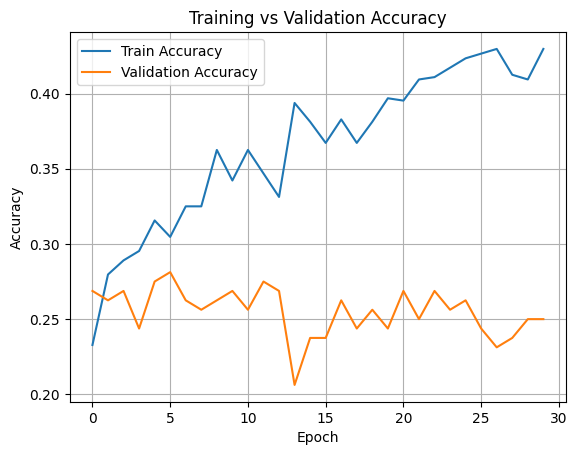

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

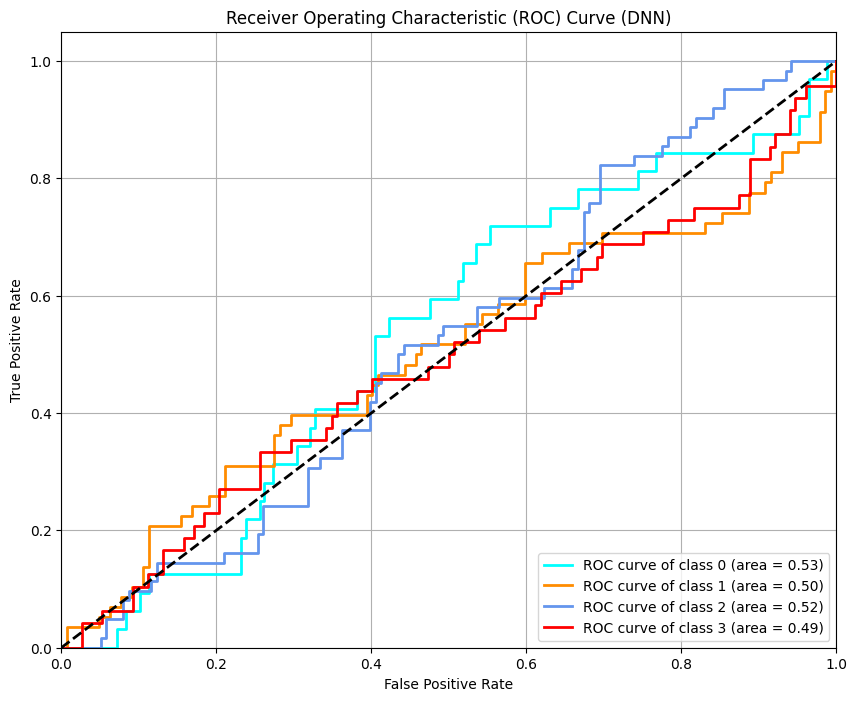

In [ ]:
y_test_bin = y_test_dnn
y_pred_probs_bin = y_pred_probs

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (DNN)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_rf)
y_pred_prob_rf = rf.predict_proba(X_test_rf)

roc_auc_rf_macro = roc_auc_score(y_test_dnn, y_pred_prob_rf, multi_class='ovr', average='macro')
print(f"AUC-ROC Score (RandomForestClassifier, OvR Macro Average): {roc_auc_rf_macro:.4f}")

roc_auc_rf_weighted = roc_auc_score(y_test_dnn, y_pred_prob_rf, multi_class='ovr', average='weighted')
print(f"AUC-ROC Score (RandomForestClassifier, OvR Weighted Average): {roc_auc_rf_weighted:.4f}")

AUC-ROC Score (RandomForestClassifier, OvR Macro Average): 0.4938
AUC-ROC Score (RandomForestClassifier, OvR Weighted Average): 0.4940


In [ ]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test_rf)

original_fault_conditions = df["Fault_Condition"].unique()
target_names = [str(condition) for condition in original_fault_conditions]

print("Classification Report (RandomForestClassifier):")
print(classification_report(y_test_rf, y_pred_rf, target_names=target_names))

Classification Report (RandomForestClassifier):
              precision    recall  f1-score   support

           2       0.17      0.38      0.23        32
           3       0.29      0.26      0.27        58
           0       0.28      0.19      0.23        62
           1       0.24      0.17      0.20        48

    accuracy                           0.23       200
   macro avg       0.24      0.25      0.23       200
weighted avg       0.26      0.23      0.23       200



In [ ]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

roc_auc_rf_macro = roc_auc_score(y_test_dnn, y_pred_prob_rf, multi_class='ovr', average='macro')
roc_auc_rf_weighted = roc_auc_score(y_test_dnn, y_pred_prob_rf, multi_class='ovr', average='weighted')

print(f"\nAccuracy (Random Forest): {accuracy_rf:.4f}")
print(f"AUC-ROC Score (Random Forest, OvR Macro Average): {roc_auc_rf_macro:.4f}")
print(f"AUC-ROC Score (Random Forest, OvR Weighted Average): {roc_auc_rf_weighted:.4f}")


Accuracy (Random Forest): 0.2350
AUC-ROC Score (Random Forest, OvR Macro Average): 0.4938
AUC-ROC Score (Random Forest, OvR Weighted Average): 0.4940


In [ ]:
# Calculate ROC curves for DNN
y_pred_probs = model.predict(X_test_dnn) # Add this line
fpr_dnn = dict()
tpr_dnn = dict()
roc_auc_dnn_ovr = dict()
for i in range(num_classes):
    fpr_dnn[i], tpr_dnn[i], _ = roc_curve(y_test_dnn[:, i], y_pred_probs[:, i])
    roc_auc_dnn_ovr[i] = auc(fpr_dnn[i], tpr_dnn[i])

# Calculate macro-average ROC for DNN
all_fpr_dnn = np.unique(np.concatenate([fpr_dnn[i] for i in range(num_classes)]))
mean_tpr_dnn = np.zeros_like(all_fpr_dnn)
for i in range(num_classes):
    mean_tpr_dnn += np.interp(all_fpr_dnn, fpr_dnn[i], tpr_dnn[i])
mean_tpr_dnn /= num_classes
fpr_macro_dnn = all_fpr_dnn
tpr_macro_dnn = mean_tpr_dnn
roc_auc_macro_dnn = auc(fpr_macro_dnn, tpr_macro_dnn)

# Calculate OvR ROC curves for Random Forest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf_ovr = dict()
for i in range(num_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_dnn[:, i], y_pred_prob_rf[:, i])
    roc_auc_rf_ovr[i] = auc(fpr_rf[i], tpr_rf[i])

# Calculate macro-average ROC for Random Forest
all_fpr_rf = np.unique(np.concatenate([fpr_rf[i] for i in range(num_classes)]))
mean_tpr_rf = np.zeros_like(all_fpr_rf)
for i in range(num_classes):
    mean_tpr_rf += np.interp(all_fpr_rf, fpr_rf[i], tpr_rf[i])
mean_tpr_rf /= num_classes
fpr_macro_rf = all_fpr_rf
tpr_macro_rf = mean_tpr_rf
roc_auc_macro_rf = auc(fpr_macro_rf, tpr_macro_rf)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


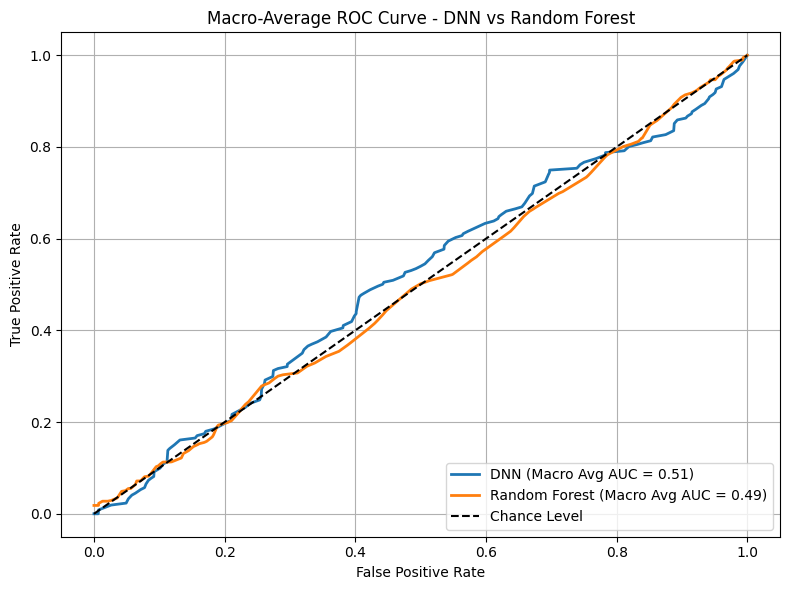

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_macro_dnn, tpr_macro_dnn, label=f"DNN (Macro Avg AUC = {roc_auc_macro_dnn:.2f})", linewidth=2)
plt.plot(fpr_macro_rf, tpr_macro_rf, label=f"Random Forest (Macro Avg AUC = {roc_auc_macro_rf:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Macro-Average ROC Curve - DNN vs Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# K-Means

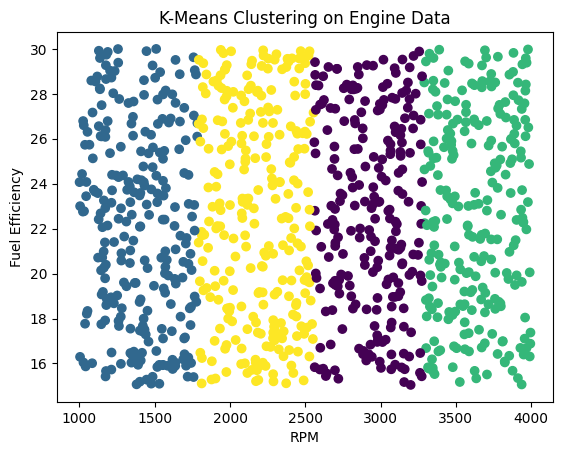

In [ ]:
# Selecting relevant features
X = df[["Temperature (°C)", "RPM", "Fuel_Efficiency", "Vibration_X", "Vibration_Y", "Vibration_Z", "Torque"]]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Visualize clusters
plt.scatter(df["RPM"], df["Fuel_Efficiency"], c=df["Cluster"], cmap="viridis")
plt.xlabel("RPM")
plt.ylabel("Fuel Efficiency")
plt.title("K-Means Clustering on Engine Data")
plt.show()

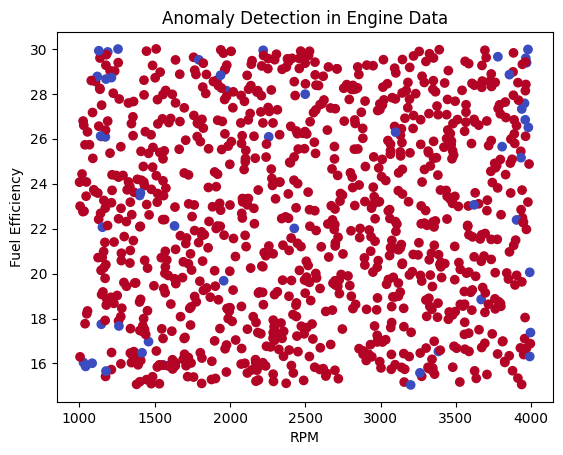

In [ ]:
X = df[["Temperature (°C)", "RPM", "Fuel_Efficiency", "Vibration_X", "Vibration_Y", "Vibration_Z", "Torque"]]

# Applying Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination level
df["Anomaly"] = iso_forest.fit_predict(X)

# Visualizing anomalies
plt.scatter(df["RPM"], df["Fuel_Efficiency"], c=df["Anomaly"], cmap="coolwarm")
plt.xlabel("RPM")
plt.ylabel("Fuel Efficiency")
plt.title("Anomaly Detection in Engine Data")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["Anomaly"] = dbscan.fit_predict(X)

# Filter out anomalies
anomalies = df[df["Anomaly"] == -1]
print(anomalies)

              Time_Stamp  Temperature (°C)          RPM  Fuel_Efficiency  \
0    2024-12-24 10:00:00         60.308585  3426.827588        20.445472   
1    2024-12-24 10:05:00        112.705055  2949.758424        23.083947   
2    2024-12-24 10:10:00        108.670976  1817.971040        20.555326   
3    2024-12-24 10:15:00        107.114691  2730.660539        23.226431   
4    2024-12-24 10:20:00        118.075814  1854.488677        21.148226   
..                   ...               ...          ...              ...   
995  2024-12-27 20:55:00         88.231211  1477.774501        23.749532   
996  2024-12-27 21:00:00        105.241946  1617.745044        16.166110   
997  2024-12-27 21:05:00        119.066775  2473.669785        17.657404   
998  2024-12-27 21:10:00         90.620157  2297.744136        17.479882   
999  2024-12-27 21:15:00         93.144406  2511.308863        17.597145   

     Vibration_X  Vibration_Y  Vibration_Z      Torque  Power_Output (kW)  \
0       0.

In [ ]:
z_scores = np.abs((X - X.mean()) / X.std())
df["Anomaly"] = (z_scores > 3).any(axis=1)
print(df[df["Anomaly"]])

Empty DataFrame
Columns: [Time_Stamp, Temperature (°C), RPM, Fuel_Efficiency, Vibration_X, Vibration_Y, Vibration_Z, Torque, Power_Output (kW), Fault_Condition, Operational_Mode, Cluster, Anomaly]
Index: []


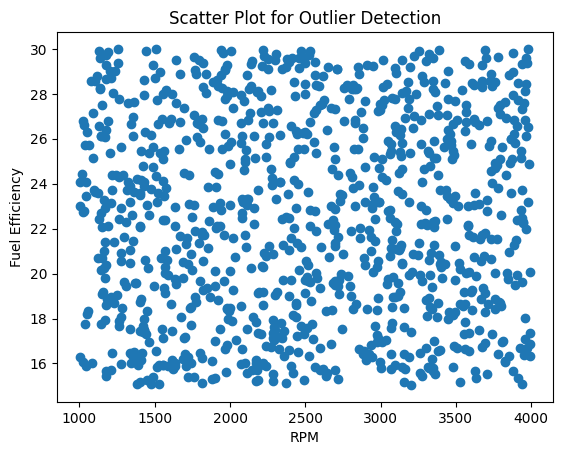

In [ ]:
plt.scatter(df["RPM"], df["Fuel_Efficiency"])
plt.xlabel("RPM")
plt.ylabel("Fuel Efficiency")
plt.title("Scatter Plot for Outlier Detection")
plt.show()

In [ ]:
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

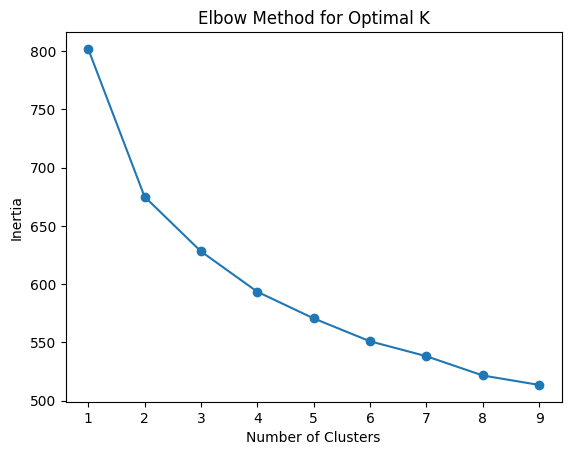

In [ ]:
df_unsupervised = df.drop(["Time_Stamp", "Operational_Mode", "Fault_Condition"], axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
cluster_mapping = {}
for cluster_label in df["Cluster"].unique():
    # Get the most frequent fault condition in the current cluster
    most_frequent_fault = df[df["Cluster"] == cluster_label]["Fault_Condition"].mode()[0]
    cluster_mapping[cluster_label] = most_frequent_fault

# Map the predicted cluster labels to the original fault conditions
y_pred_kmeans_mapped = df["Cluster"].map(cluster_mapping)

original_fault_conditions = df["Fault_Condition"].unique()
target_names = [str(condition) for condition in original_fault_conditions]

print("Classification Report (KMeans):")
print(classification_report(df["Fault_Condition"], y_pred_kmeans_mapped, target_names=target_names))

Classification Report (KMeans):
              precision    recall  f1-score   support

           2       0.27      0.28      0.27       258
           3       0.26      0.26      0.26       248
           0       0.28      0.51      0.36       265
           1       0.00      0.00      0.00       229

    accuracy                           0.27      1000
   macro avg       0.20      0.26      0.22      1000
weighted avg       0.21      0.27      0.23      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
